In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("BDM Complete Data.xlsx")

In [3]:
df.head()

,Item_Name,Category,Purchase_Price,Selling_Price,Profit_per_kg,Expiry_date(Months),Expiry_date in Months,Monthly_sale(kg),Purchase_Date(Months),Purchase_Date,Stockend_date,Ordered_date,Ordered_date(Months),Remaining_Stock(kg),initial_stock(kg),initial_stock(dozen),Remaining_stock(dozen)
0,aataa,Food item,38.0,42,4.0,2.0,February,350,August,2022-08-06,2022-12-25,2022-08-06,August,25,100,0,0
1,ariel,Household item,18.0,22,4.0,12.0,December,30,August,2022-08-04,2022-12-28,2023-08-05,August,20,50,0,0
2,badaam,Dry Fruits,690.0,780,90.0,3.0,March,25,August,2022-08-03,2022-12-20,2022-08-01,August,25,40,0,0
3,badamfal,Dry Fruits,1250.0,1400,150.0,4.0,April,15,August,2022-08-03,2022-12-20,2023-08-05,August,2,20,0,0
4,basundi,Dairy Product,50.0,65,15.0,1.0,January,30,January,2023-01-06,2023-03-21,2023-12-28,December,10,10,0,0


In [4]:
#check missing values
df.isnull().sum()

Item_Name                 0
Category                  0
Purchase_Price            0
Selling_Price             0
Profit_per_kg             0
Expiry_date(Months)       0
Expiry_date in Months     0
Monthly_sale(kg)          0
Purchase_Date(Months)     0
Purchase_Date             0
Stockend_date             0
Ordered_date              0
Ordered_date(Months)      0
Remaining_Stock(kg)       0
initial_stock(kg)         0
initial_stock(dozen)      0
Remaining_stock(dozen)    0
dtype: int64

In [5]:
selected_categories=df['Category'].unique()

In [6]:
selected_categories

array(['Food item', 'Household item', 'Dry Fruits', 'Dairy Product',
       'Snacks', 'Beauty Product'], dtype=object)

In [7]:
# Convert date columns to datetime
date_columns = ['Purchase_Date', 'Stockend_date', 'Ordered_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

In [8]:
#  Data Exploration
basic_stats = df[['Purchase_Price', 'Selling_Price', 'Profit_per_kg', 'Expiry_date(Months)', 'Monthly_sale(kg)', 'Remaining_Stock(kg)']].describe()
print(basic_stats)

       Purchase_Price  Selling_Price  Profit_per_kg  Expiry_date(Months)  \
count      100.000000     100.000000     100.000000           100.000000   
mean       183.169000     211.760000      28.591000             3.377600   
std        378.767066     428.933117      54.053703             3.374742   
min          0.900000       1.000000       0.100000             0.260000   
25%         30.000000      35.000000       5.000000             1.000000   
50%         68.000000      77.500000       8.000000             2.000000   
75%        116.250000     140.000000      25.000000             4.000000   
max       2400.000000    2700.000000     300.000000            12.000000   

       Monthly_sale(kg)  Remaining_Stock(kg)  
count         100.00000           100.000000  
mean          235.80000            26.510000  
std           678.60841           100.771117  
min             2.00000             0.000000  
25%            20.00000             1.750000  
50%            40.00000          

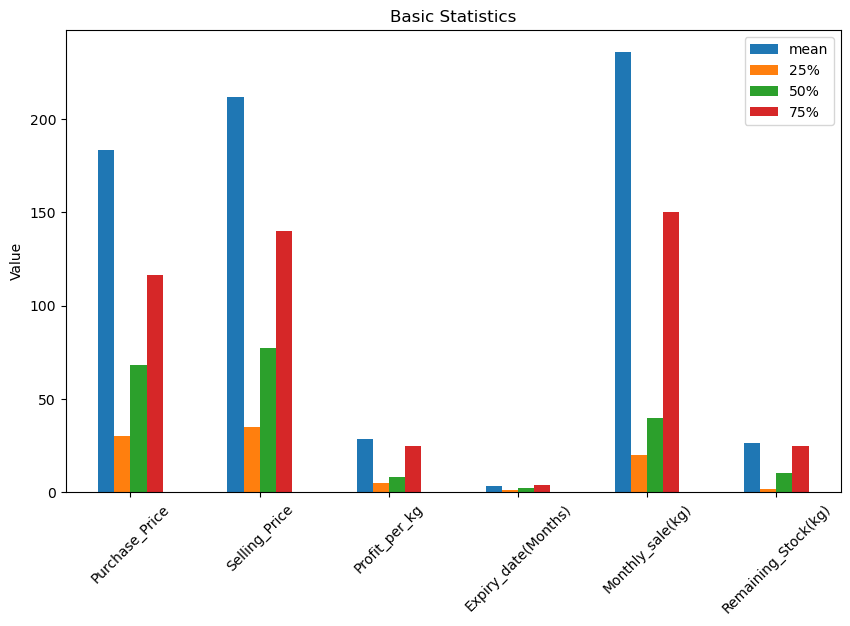

In [9]:
basic_stats = basic_stats.T
# Create box plots for the statistics
basic_stats[['mean', '25%', '50%', '75%']].plot(kind='bar', figsize=(10, 6))
plt.title('Basic Statistics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


In [10]:
#  Profit Analysis
df['Profit'] = (df['Selling_Price'] - df['Purchase_Price']) * df['Monthly_sale(kg)']
df['Profit']

0     1400.0
1      120.0
2     2250.0
3     2250.0
4      450.0
       ...  
95    2250.0
96      50.0
97     140.0
98     600.0
99     120.0
Name: Profit, Length: 100, dtype: float64

In [11]:
#  Category Analysis
category_stats = df.groupby('Category').agg({
    'Profit': 'sum',
    'Profit_per_kg': 'mean',
    'Monthly_sale(kg)': 'mean'
}).reset_index()
print(category_stats)

         Category    Profit  Profit_per_kg  Monthly_sale(kg)
0  Beauty Product    1218.5       9.620000         25.000000
1   Dairy Product     970.0       9.333333         36.666667
2      Dry Fruits    8200.0      79.000000         23.000000
3       Food item   94950.0      37.254902        181.823529
4  Household item  108036.0       7.523810        638.523810
5          Snacks   11414.0      22.000000         36.533333


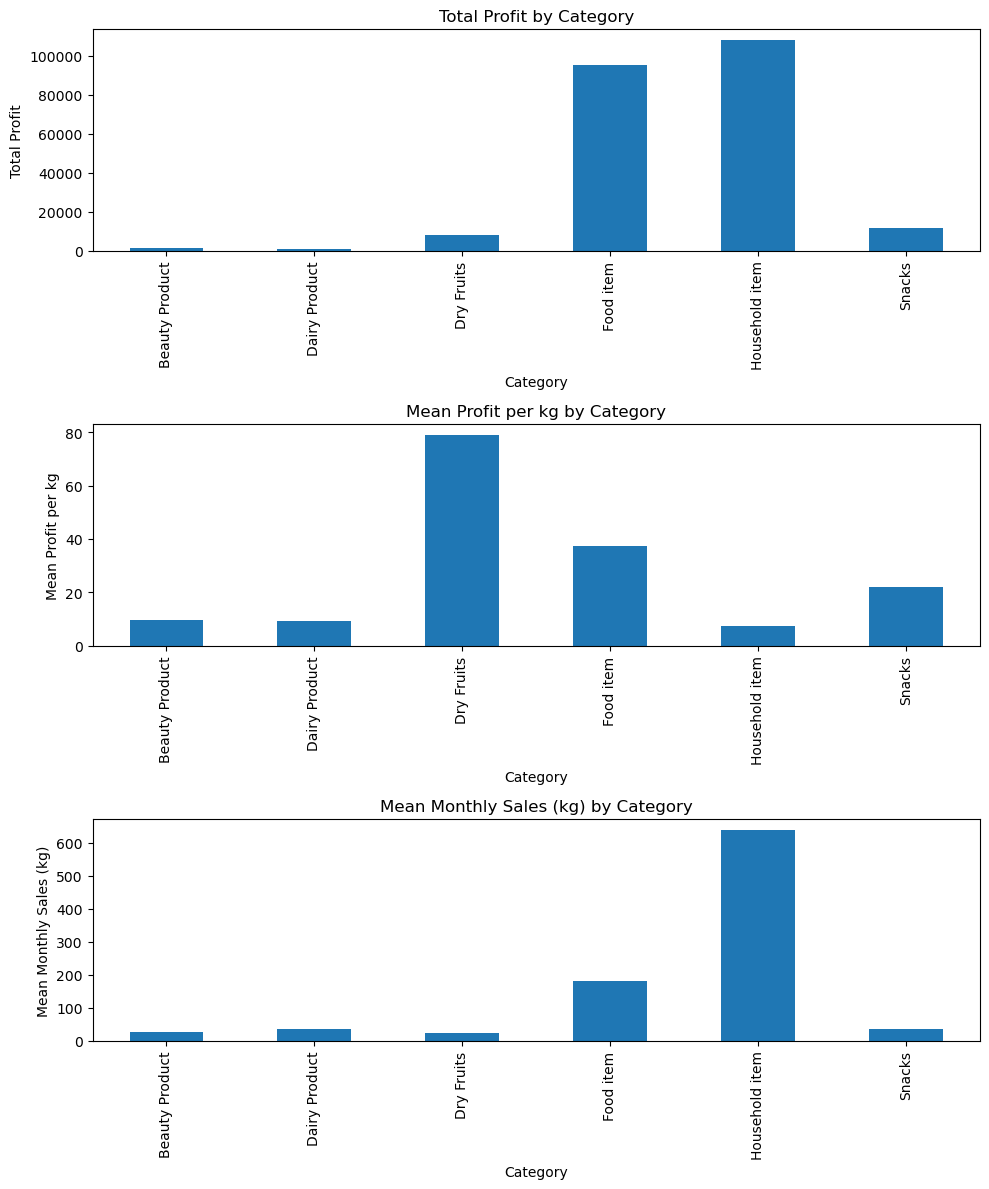

In [12]:
category_stats = category_stats.set_index('Category').T

# Create a bar chart for each statistic
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

category_stats.loc['Profit'].plot(kind='bar', ax=axes[0])
axes[0].set_ylabel('Total Profit')
axes[0].set_title('Total Profit by Category')

category_stats.loc['Profit_per_kg'].plot(kind='bar', ax=axes[1])
axes[1].set_ylabel('Mean Profit per kg')
axes[1].set_title('Mean Profit per kg by Category')

category_stats.loc['Monthly_sale(kg)'].plot(kind='bar', ax=axes[2])
axes[2].set_ylabel('Mean Monthly Sales (kg)')
axes[2].set_title('Mean Monthly Sales (kg) by Category')

plt.tight_layout()
plt.show()


In [13]:
# Inventory Analysis
df['Turnover_Rate'] = df['Monthly_sale(kg)'] / df['Remaining_Stock(kg)']
df['Turnover_Rate']

0     14.0
1      1.5
2      1.0
3      7.5
4      3.0
      ... 
95     3.0
96     2.0
97     inf
98     3.0
99     8.0
Name: Turnover_Rate, Length: 100, dtype: float64

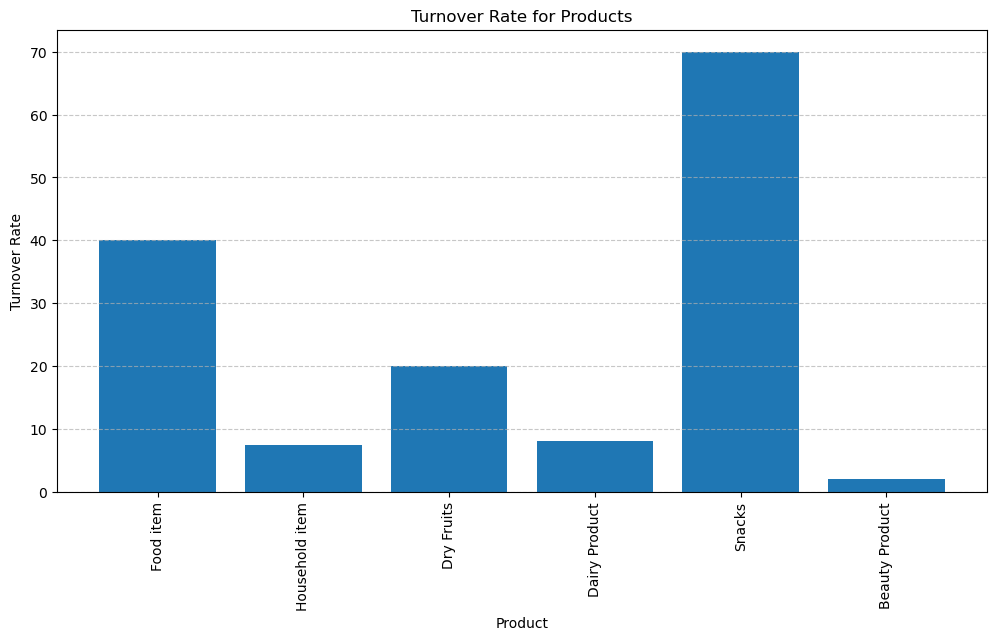

In [14]:
# Create a bar chart to visualize the turnover rate for each product
plt.figure(figsize=(12, 6))  
plt.bar(df['Category'], df['Turnover_Rate'])
plt.xlabel('Product')
plt.ylabel('Turnover Rate')
plt.title('Turnover Rate for Products')
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


In [15]:
# Sort the DataFrame by purchase date
df = df.sort_values(by='Purchase_Date')
df.head()

,Item_Name,Category,Purchase_Price,Selling_Price,Profit_per_kg,Expiry_date(Months),Expiry_date in Months,Monthly_sale(kg),Purchase_Date(Months),Purchase_Date,Stockend_date,Ordered_date,Ordered_date(Months),Remaining_Stock(kg),initial_stock(kg),initial_stock(dozen),Remaining_stock(dozen),Profit,Turnover_Rate
49,meere,Food item,750.0,900,150.0,1.0,January,20,August,2022-08-03,2022-12-20,2022-08-01,August,5,20,0,0,3000.0,4.0
77,shahajeere,Food item,550.0,760,210.0,2.0,February,20,August,2022-08-03,2022-12-20,2023-08-05,August,1,20,0,0,4200.0,20.0
90,trifal,Food item,650.0,800,150.0,1.0,January,10,August,2022-08-03,2022-12-20,2023-08-05,August,2,5,0,0,1500.0,5.0
31,kajju,Dry Fruits,680.0,760,80.0,2.0,February,20,August,2022-08-03,2022-12-20,2022-08-01,August,1,50,0,0,1600.0,20.0
94,velchi,Food item,2000.0,2200,200.0,1.0,January,15,August,2022-08-03,2022-12-20,2022-08-01,August,5,5,0,0,3000.0,3.0


In [16]:
# Calculate the days it took to sell the initial stock
df['Days_to_Sell_Initial_Stock'] = (df['Ordered_date'] - df['Purchase_Date']).dt.days
df['Days_to_Sell_Initial_Stock'].head()

49     -2
77    367
90    367
31     -2
94     -2
Name: Days_to_Sell_Initial_Stock, dtype: int64

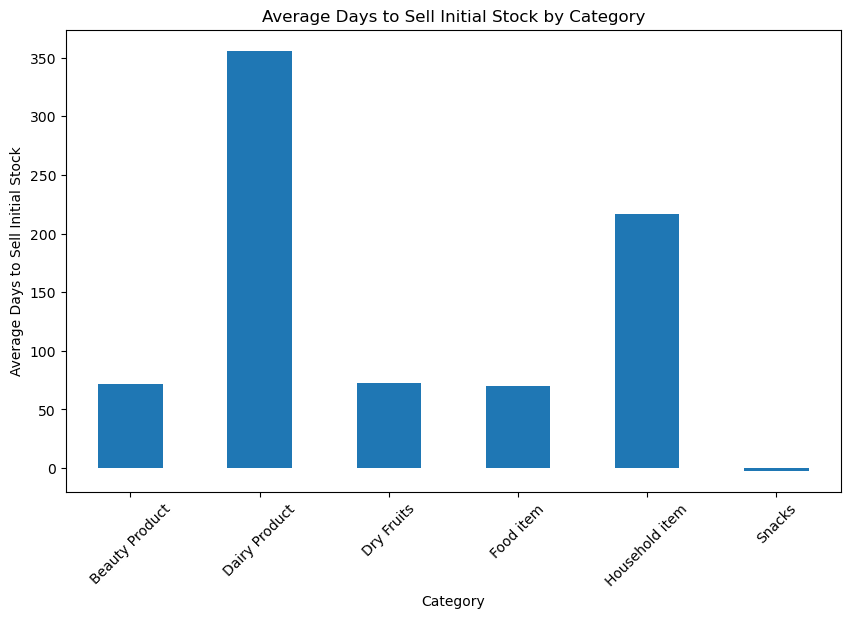

In [17]:
# Calculate the days it took to sell the initial stock category-wise
category_days_to_sell = df.groupby('Category')['Days_to_Sell_Initial_Stock'].mean()

# Create a bar chart to visualize the average days to sell the initial stock by category
plt.figure(figsize=(10, 6))  
category_days_to_sell.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Average Days to Sell Initial Stock')
plt.title('Average Days to Sell Initial Stock by Category')
plt.xticks(rotation=45)
plt.show()


In [18]:
today = pd.to_datetime('2023-10-17')  
df['Days_Remaining_to_Expiry'] = (df['Stockend_date'] - today).dt.days
df['Days_Remaining_to_Expiry'] 







49   -301
77   -301
90   -301
31   -301
94   -301
     ... 
83   -210
80   -210
55   -210
99   -210
18   -211
Name: Days_Remaining_to_Expiry, Length: 100, dtype: int64

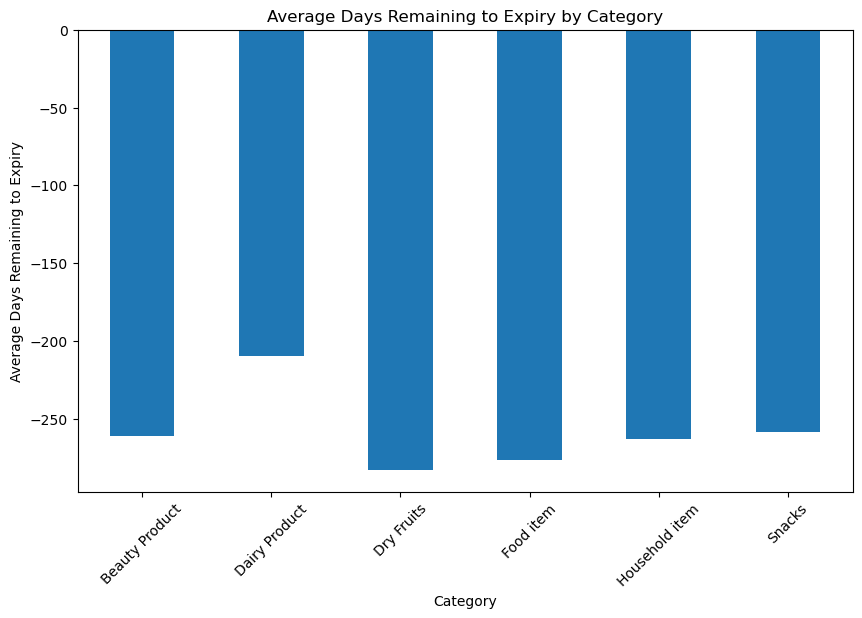

In [19]:
# Calculate the days remaining for products to expire category-wise
category_days_remaining = df.groupby('Category')['Days_Remaining_to_Expiry'].mean()

# Create a bar chart to visualize the average days remaining to expire by category
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
category_days_remaining.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Average Days Remaining to Expiry')
plt.title('Average Days Remaining to Expiry by Category')
plt.xticks(rotation=45)
plt.show()


In [20]:
# Analyze products with low remaining stock
low_stock_threshold = 10  # Set your threshold for low stock
low_stock_products = df[df['Remaining_Stock(kg)'] < low_stock_threshold]

# Calculate the percentage of initial stock remaining for each product
df['Remaining_Stock_Percentage'] = (df['Remaining_Stock(kg)'] / df['initial_stock(kg)']) * 100
df['Remaining_Stock_Percentage']

49     25.000000
77      5.000000
90     40.000000
31      2.000000
94    100.000000
         ...    
83    200.000000
80     50.000000
55      0.000000
99    100.000000
18     33.333333
Name: Remaining_Stock_Percentage, Length: 100, dtype: float64

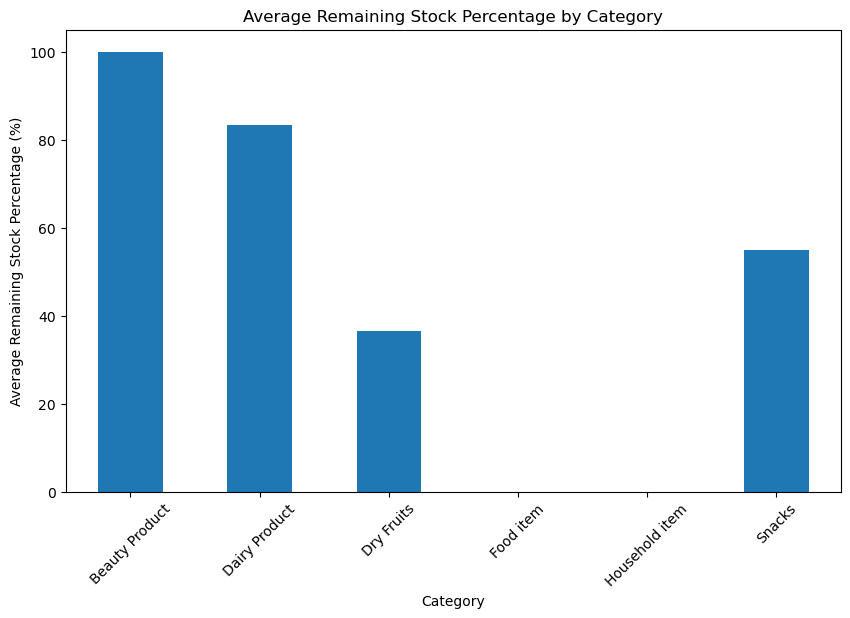

Products with low remaining stock by category:
Category: Beauty Product
Product: parashut hairoil - Remaining Stock: 0 kg
Product: vico cream - Remaining Stock: 5 kg
Product: Dove Shampoo - Remaining Stock: 0 kg
Product: nivea cream - Remaining Stock: 0 kg
Product: patanjali face wash - Remaining Stock: 0 kg
Category: Dairy Product
Product: shreekhand - Remaining Stock: 5 kg
Product: yoghurt - Remaining Stock: 5 kg
Category: Dry Fruits
Product: kajju - Remaining Stock: 1 kg
Product: badamfal - Remaining Stock: 2 kg
Category: Food item
Product: meere - Remaining Stock: 5 kg
Product: shahajeere - Remaining Stock: 1 kg
Product: trifal - Remaining Stock: 2 kg
Product: velchi - Remaining Stock: 5 kg
Product: haldi - Remaining Stock: 3 kg
Product: veldore - Remaining Stock: 5 kg
Product: ova - Remaining Stock: 5 kg
Product: jaayapatri - Remaining Stock: 5 kg
Product: rampatri - Remaining Stock: 5 kg
Product: kassori methi - Remaining Stock: 5 kg
Product: mutton masala - Remaining Stock: 0 kg

In [21]:
# Create a bar chart to visualize the average remaining stock percentage by category
category_remaining_stock_percentage = df.groupby('Category')['Remaining_Stock_Percentage'].mean()

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
category_remaining_stock_percentage.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Average Remaining Stock Percentage (%)')
plt.title('Average Remaining Stock Percentage by Category')
plt.xticks(rotation=45)
plt.show()

# Analyze products with low remaining stock by category
category_low_stock_threshold = 10  # Set your threshold for low stock by category
low_stock_products_by_category = df[df['Remaining_Stock(kg)'] < category_low_stock_threshold]

# Display the products with low remaining stock by category
print("Products with low remaining stock by category:")
for category, products in low_stock_products_by_category.groupby('Category'):
    print(f"Category: {category}")
    for index, row in products.iterrows():
        print(f"Product: {row['Item_Name']} - Remaining Stock: {row['Remaining_Stock(kg)']} kg")


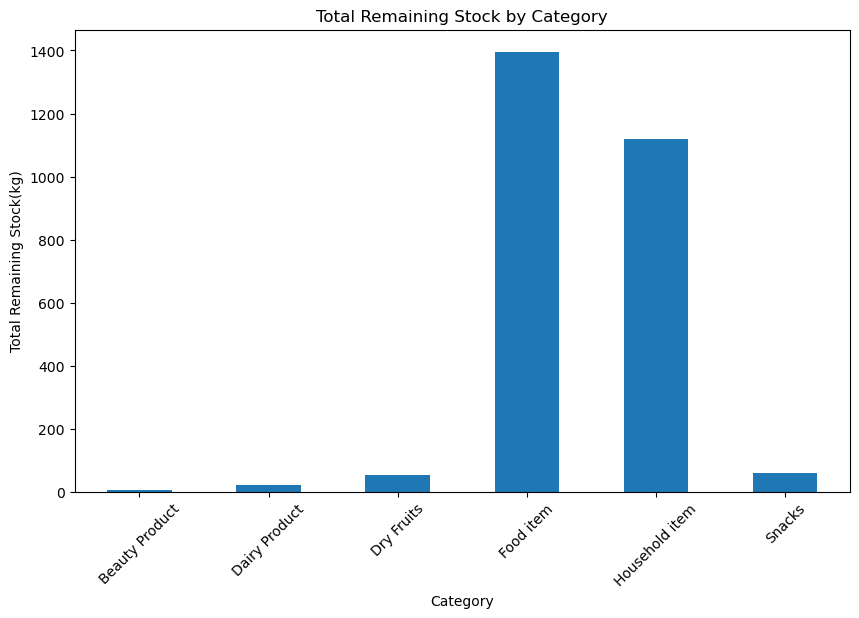

In [22]:
# Create a bar chart to visualize the total remaining stock percentage by category
category_remaining_stock_percentage = df.groupby('Category')['Remaining_Stock(kg)'].sum()

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
category_remaining_stock_percentage.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Remaining Stock(kg)')
plt.title('Total Remaining Stock by Category')
plt.xticks(rotation=45)
plt.show()


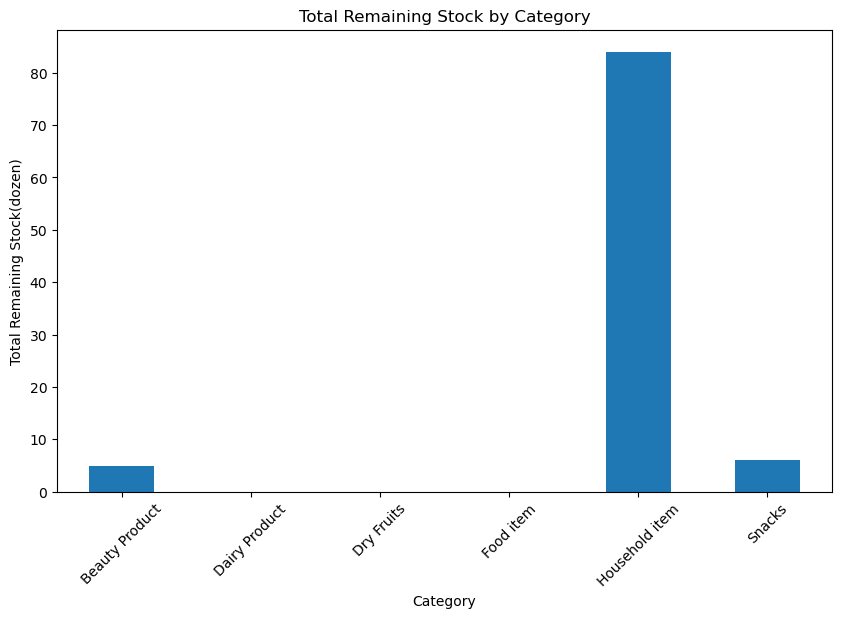

In [23]:
category_remaining_stock = df.groupby('Category')['Remaining_stock(dozen)'].sum()

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
category_remaining_stock.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Remaining Stock(dozen)')
plt.title('Total Remaining Stock by Category')
plt.xticks(rotation=45)
plt.show()

In [24]:
print(df['Category'])

49        Food item
77        Food item
90        Food item
31       Dry Fruits
94        Food item
          ...      
83        Food item
80    Dairy Product
55        Food item
99    Dairy Product
18           Snacks
Name: Category, Length: 100, dtype: object


In [25]:
food_items_df = df[df['Category'] == 'Food item']
food_items_df

,Item_Name,Category,Purchase_Price,Selling_Price,Profit_per_kg,Expiry_date(Months),Expiry_date in Months,Monthly_sale(kg),Purchase_Date(Months),Purchase_Date,...,Ordered_date(Months),Remaining_Stock(kg),initial_stock(kg),initial_stock(dozen),Remaining_stock(dozen),Profit,Turnover_Rate,Days_to_Sell_Initial_Stock,Days_Remaining_to_Expiry,Remaining_Stock_Percentage
49,meere,Food item,750.0,900,150.0,1.0,January,20,August,2022-08-03,...,August,5,20,0,0,3000.0,4.000000,-2,-301,25.000000
77,shahajeere,Food item,550.0,760,210.0,2.0,February,20,August,2022-08-03,...,August,1,20,0,0,4200.0,20.000000,367,-301,5.000000
90,trifal,Food item,650.0,800,150.0,1.0,January,10,August,2022-08-03,...,August,2,5,0,0,1500.0,5.000000,367,-301,40.000000
94,velchi,Food item,2000.0,2200,200.0,1.0,January,15,August,2022-08-03,...,August,5,5,0,0,3000.0,3.000000,-2,-301,100.000000
22,haldi,Food item,140.0,200,60.0,1.0,January,50,August,2022-08-03,...,August,3,5,0,0,3000.0,16.666667,367,-301,60.000000
95,veldore,Food item,950.0,1100,150.0,1.0,January,15,August,2022-08-03,...,August,5,3,0,0,2250.0,3.000000,367,-301,166.666667
57,ova,Food item,240.0,300,60.0,2.0,February,25,August,2022-08-03,...,August,5,5,0,0,1500.0,5.000000,-2,-301,100.000000
54,mugdal,Food item,102.0,110,8.0,2.0,February,350,August,2022-08-04,...,August,60,90,0,0,2800.0,5.833333,-1,-296,66.666667
53,moog,Food item,95.0,100,5.0,1.0,January,50,August,2022-08-04,...,August,40,60,0,0,250.0,1.250000,-1,-296,66.666667
51,misal masala,Food item,17.0,20,3.0,1.0,January,24,August,2022-08-04,...,August,30,5,0,0,72.0,0.800000,-2,-294,600.000000


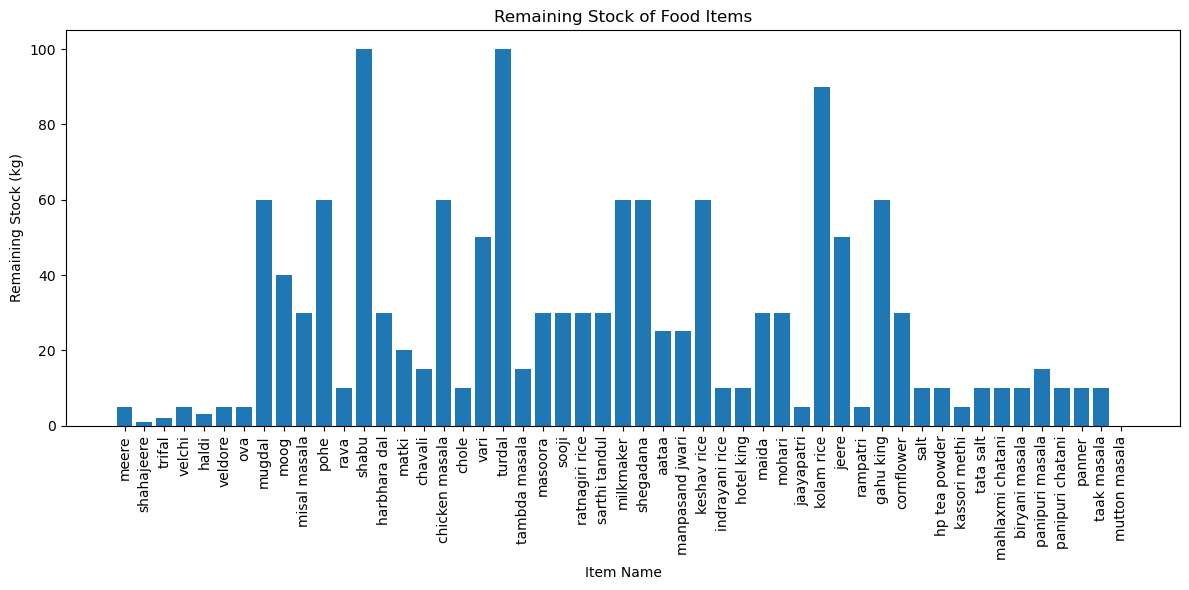

In [26]:
# Create a bar graph for 'Remaining_Stock(kg)'
plt.figure(figsize=(12, 6))
plt.bar(food_items_df['Item_Name'], food_items_df['Remaining_Stock(kg)'])
plt.xlabel('Item Name')
plt.ylabel('Remaining Stock (kg)')
plt.title('Remaining Stock of Food Items')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

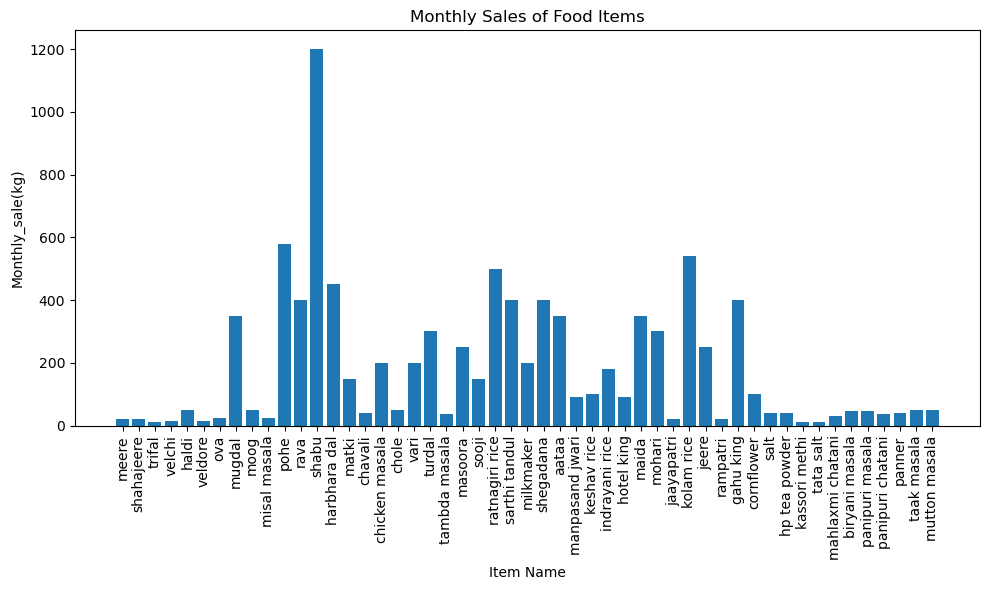

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(food_items_df['Item_Name'], food_items_df['Monthly_sale(kg)'])
plt.xlabel('Item Name')
plt.ylabel('Monthly_sale(kg)')
plt.title('Monthly Sales of Food Items')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

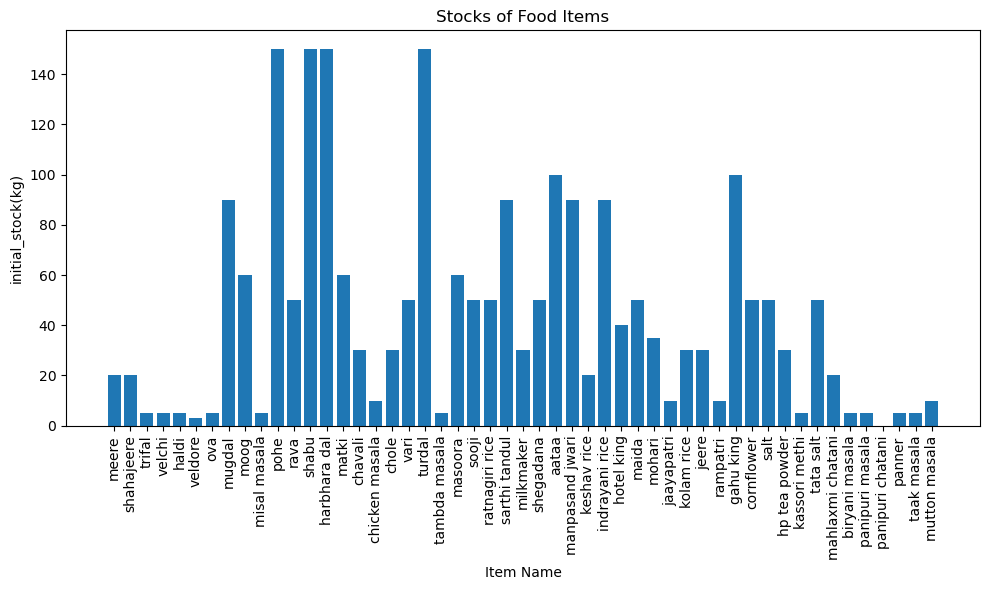

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(food_items_df['Item_Name'], food_items_df['initial_stock(kg)'])
plt.xlabel('Item Name')
plt.ylabel('initial_stock(kg)')
plt.title('Stocks of Food Items')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

In [29]:
household_items_df = df[df['Category'] == 'Household item']
household_items_df

,Item_Name,Category,Purchase_Price,Selling_Price,Profit_per_kg,Expiry_date(Months),Expiry_date in Months,Monthly_sale(kg),Purchase_Date(Months),Purchase_Date,...,Ordered_date(Months),Remaining_Stock(kg),initial_stock(kg),initial_stock(dozen),Remaining_stock(dozen),Profit,Turnover_Rate,Days_to_Sell_Initial_Stock,Days_Remaining_to_Expiry,Remaining_Stock_Percentage
97,wheel soap,Household item,8.0,10,2.0,12.0,December,70,August,2022-08-03,...,August,0,0,50,20,140.0,inf,367,-301,NaN
64,patanjali dantkanti,Household item,120.0,128,8.0,9.0,September,10,August,2022-08-04,...,August,0,0,15,3,80.0,inf,367,-295,NaN
72,rin soap,Household item,65.0,73,8.0,1.0,January,20,August,2022-08-04,...,August,0,0,30,12,160.0,inf,366,-301,NaN
48,medmix soap,Household item,42.0,48,6.0,6.0,June,20,August,2022-08-04,...,August,0,0,20,10,120.0,inf,366,-293,NaN
40,lifebuy soap,Household item,122.0,130,8.0,3.0,March,20,August,2022-08-04,...,August,0,0,20,3,160.0,inf,366,-293,NaN
25,Harpik,Household item,80.0,88,8.0,6.0,June,20,August,2022-08-04,...,August,20,5,0,0,160.0,1.000000,366,-293,400.000000
1,ariel,Household item,18.0,22,4.0,12.0,December,30,August,2022-08-04,...,August,20,50,0,0,120.0,1.500000,366,-293,40.000000
6,brush,Household item,17.0,20,3.0,12.0,December,2,August,2022-08-04,...,August,0,0,5,1,6.0,inf,2,-296,NaN
7,cloth brush,Household item,17.0,20,3.0,12.0,December,10,August,2022-08-04,...,August,0,0,4,1,30.0,inf,366,-293,NaN
12,colgate paste,Household item,7.0,10,3.0,3.0,March,20,August,2022-08-04,...,August,20,5,0,0,60.0,1.000000,367,-295,400.000000


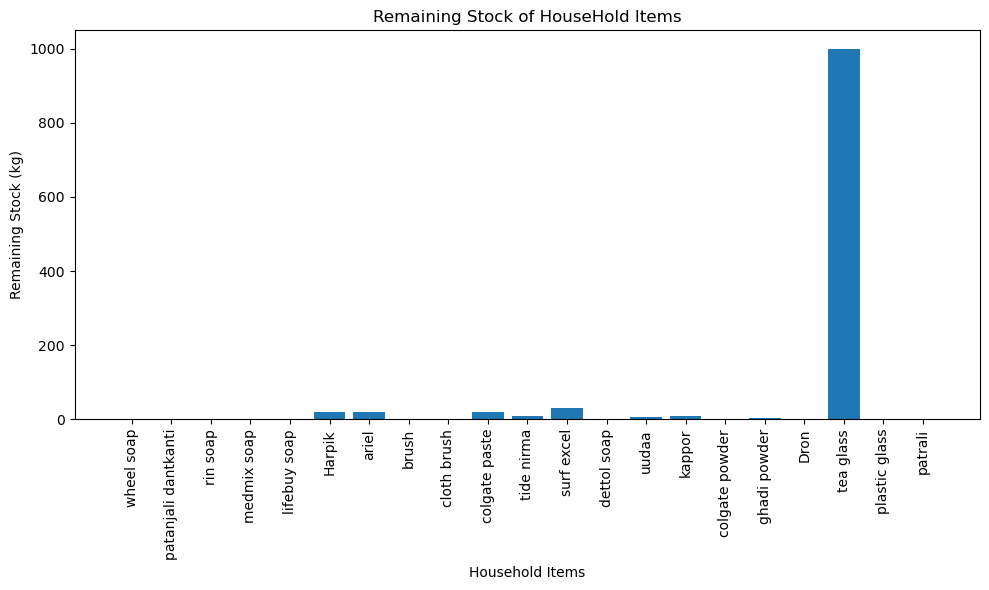

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(household_items_df['Item_Name'], household_items_df['Remaining_Stock(kg)'])
plt.xlabel('Household Items')
plt.ylabel('Remaining Stock (kg)')
plt.title('Remaining Stock of HouseHold Items')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

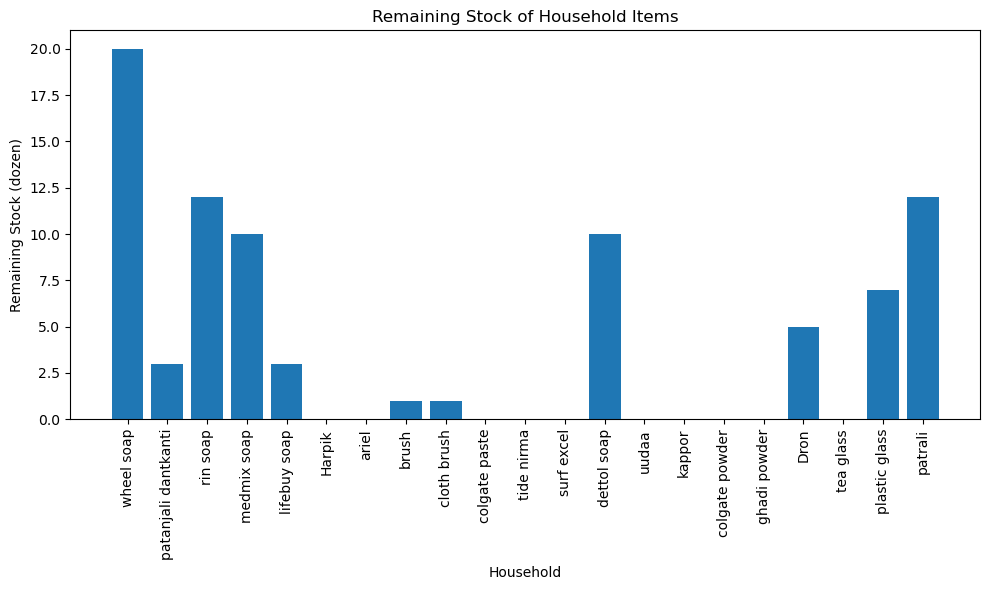

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(household_items_df['Item_Name'], household_items_df['Remaining_stock(dozen)'])
plt.xlabel('Household')
plt.ylabel('Remaining Stock (dozen)')
plt.title('Remaining Stock of Household Items')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

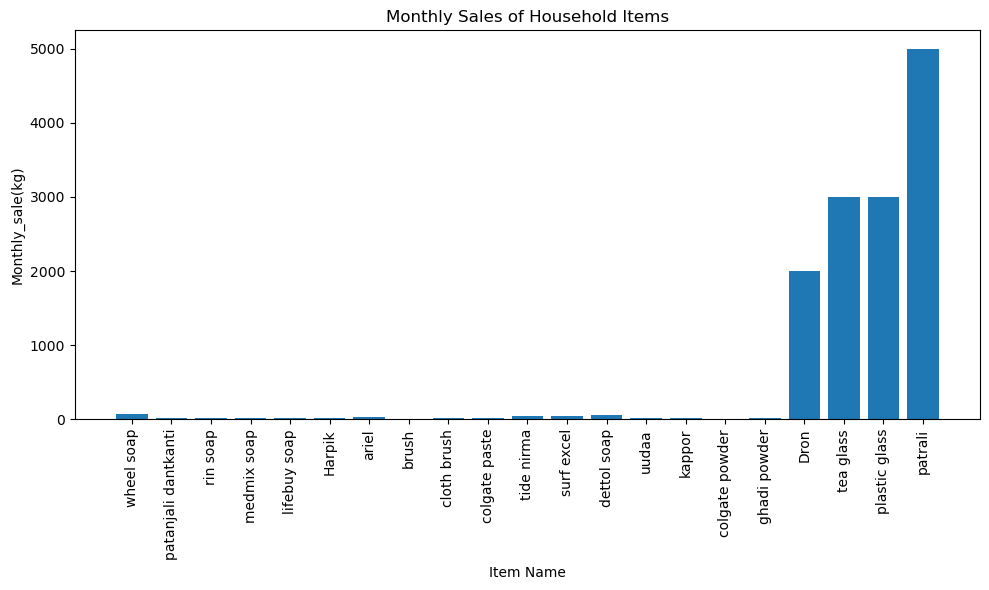

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(household_items_df['Item_Name'], household_items_df['Monthly_sale(kg)'])
plt.xlabel('Item Name')
plt.ylabel('Monthly_sale(kg)')
plt.title('Monthly Sales of Household Items')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

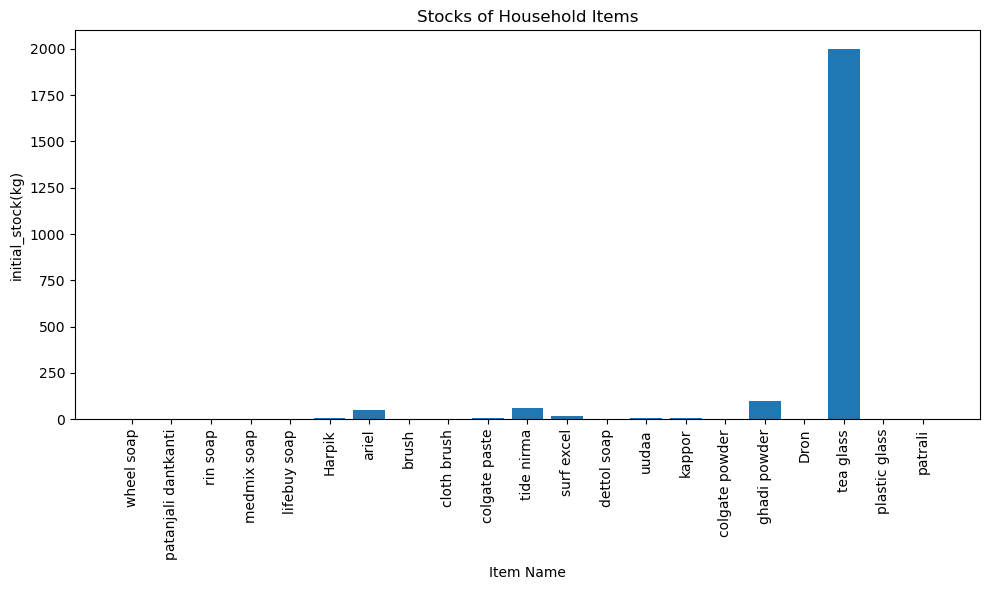

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(household_items_df['Item_Name'], household_items_df['initial_stock(kg)'])
plt.xlabel('Item Name')
plt.ylabel('initial_stock(kg)')
plt.title('Stocks of Household Items')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

In [34]:
df.columns

Index(['Item_Name', 'Category', 'Purchase_Price', 'Selling_Price',
       'Profit_per_kg', 'Expiry_date(Months)', 'Expiry_date in Months',
       'Monthly_sale(kg)', 'Purchase_Date(Months)', 'Purchase_Date',
       'Stockend_date', 'Ordered_date', 'Ordered_date(Months)',
       'Remaining_Stock(kg)', 'initial_stock(kg)', 'initial_stock(dozen)',
       'Remaining_stock(dozen)', 'Profit', 'Turnover_Rate',
       'Days_to_Sell_Initial_Stock', 'Days_Remaining_to_Expiry',
       'Remaining_Stock_Percentage'],
      dtype='object')

C:\Users\khotv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\khotv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\khotv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\khotv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

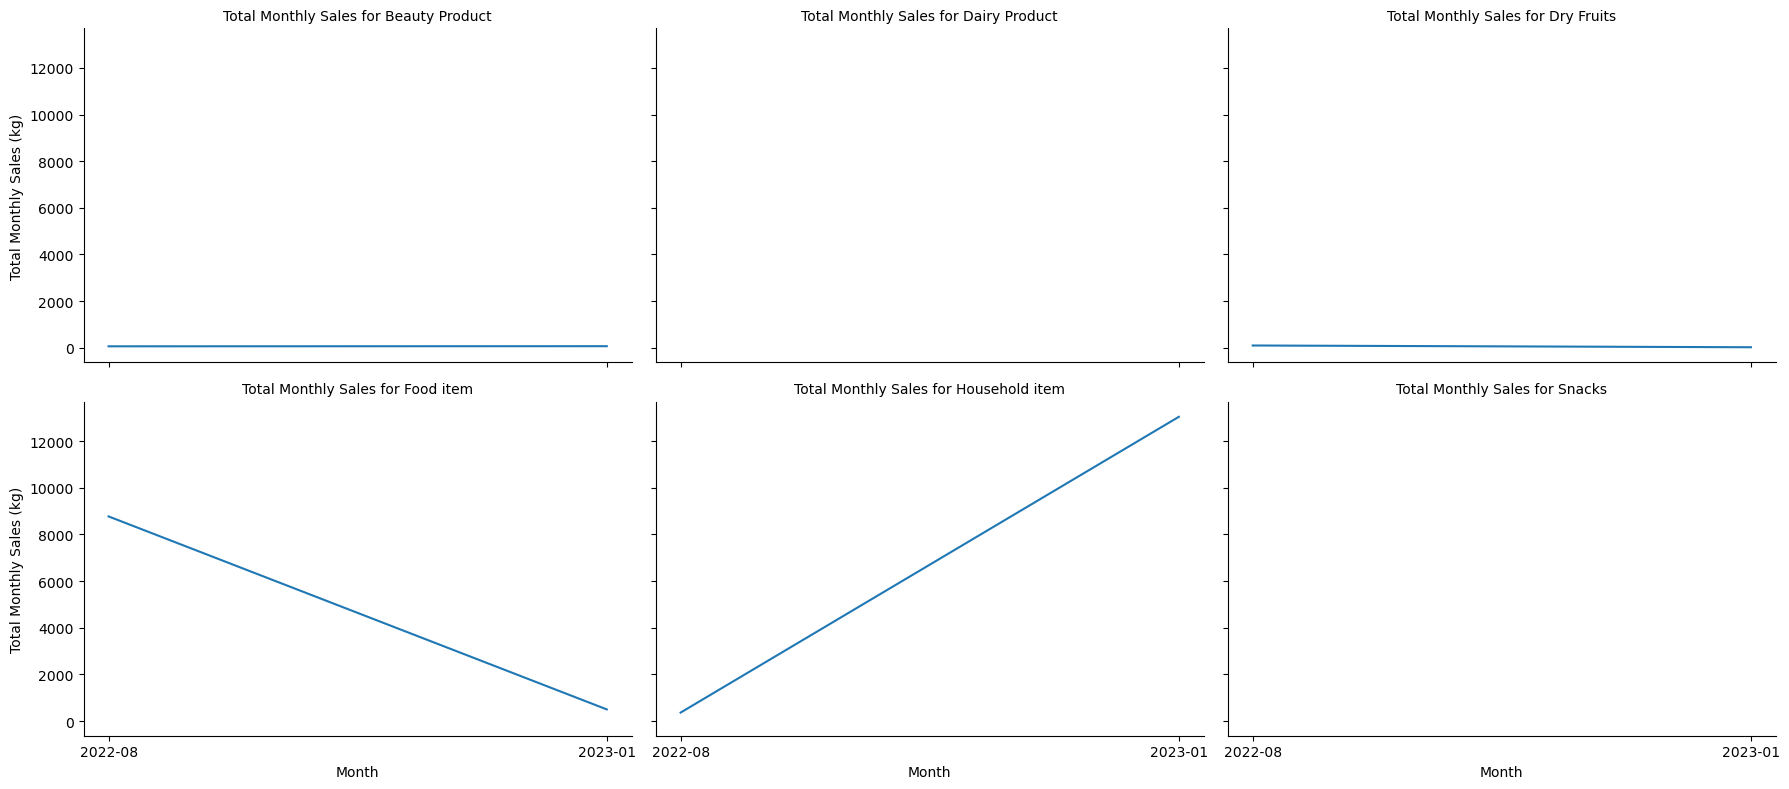

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by category and purchase month
monthly_sales_by_category = df.groupby(['Category', df['Purchase_Date'].dt.strftime('%Y-%m')])['Monthly_sale(kg)'].sum().reset_index()

# Create separate subplots for each category
g = sns.FacetGrid(monthly_sales_by_category, col='Category', col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'Purchase_Date', 'Monthly_sale(kg)')
g.set_axis_labels('Month', 'Total Monthly Sales (kg)')
g.set_titles('Total Monthly Sales for {col_name}')

plt.tight_layout()
plt.show()


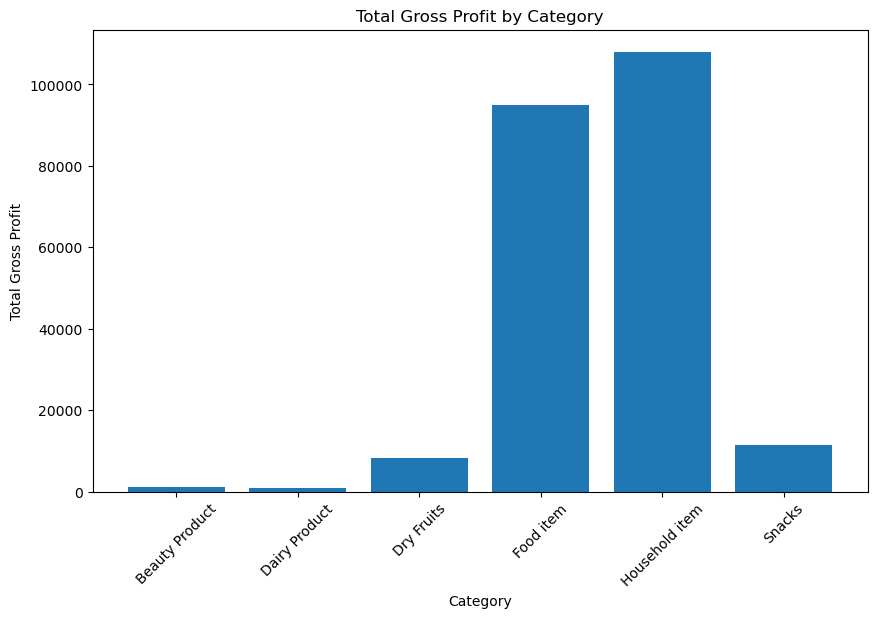

In [36]:
# Calculate and visualize profitability by category
df['Gross_Profit'] = (df['Selling_Price'] - df['Purchase_Price']) * df['Monthly_sale(kg)']
profitability_by_category = df.groupby('Category')['Gross_Profit'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(profitability_by_category['Category'], profitability_by_category['Gross_Profit'])
plt.xlabel('Category')
plt.ylabel('Total Gross Profit')
plt.title('Total Gross Profit by Category')
plt.xticks(rotation=45)
plt.show()


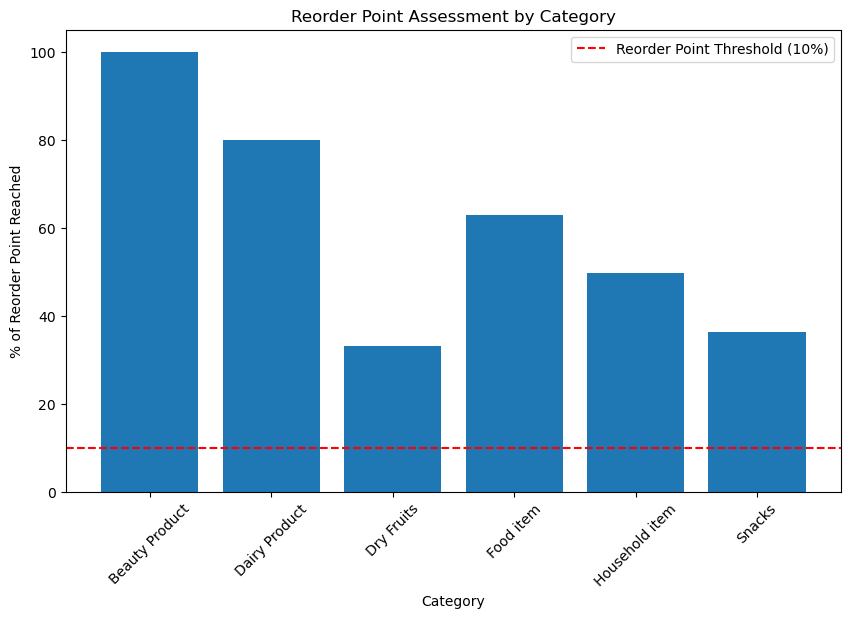

In [37]:
# Calculate and visualize reorder point assessment for each category
reorder_point_threshold = 10  
reorder_point_assessment = df.groupby('Category')['Remaining_Stock(kg)'].mean() / df.groupby('Category')['initial_stock(kg)'].mean() * 100
plt.figure(figsize=(10, 6))
plt.bar(reorder_point_assessment.index, reorder_point_assessment.values)
plt.xlabel('Category')
plt.ylabel('% of Reorder Point Reached')
plt.title('Reorder Point Assessment by Category')
plt.xticks(rotation=45)
plt.axhline(y=reorder_point_threshold, color='r', linestyle='--', label=f'Reorder Point Threshold ({reorder_point_threshold}%)')
plt.legend()
plt.show()


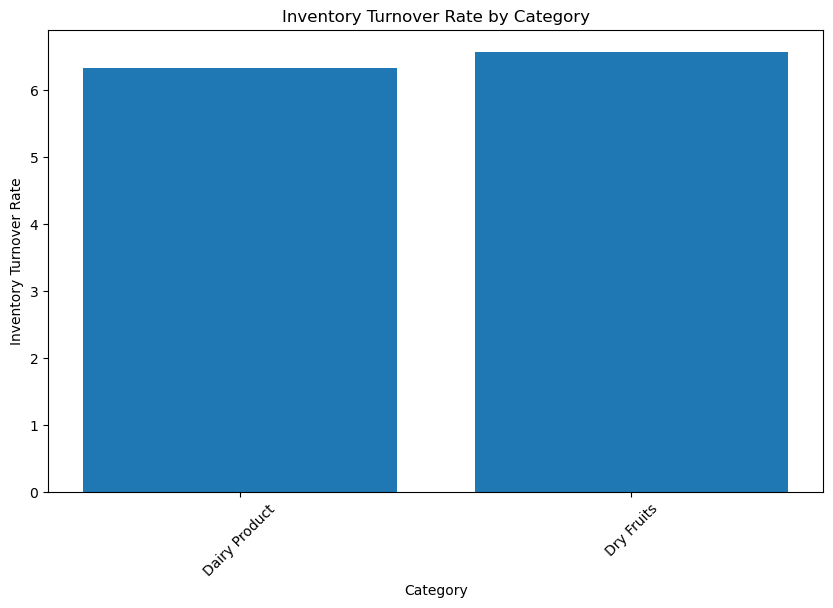

In [38]:
# Calculate and visualize inventory turnover rate for each category
inventory_turnover_by_category = df.groupby('Category')['Turnover_Rate'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(inventory_turnover_by_category['Category'], inventory_turnover_by_category['Turnover_Rate'])
plt.xlabel('Category')
plt.ylabel('Inventory Turnover Rate')
plt.title('Inventory Turnover Rate by Category')
plt.xticks(rotation=45)
plt.show()


In [39]:
# Define remaining stock thresholds for categorization
category_low_stock_threshold = 5

for category in selected_categories:
    print(f'Recommendations for Category: {category}')

    # Check inventory turnover rates
    inventory_turnover = inventory_turnover_by_category[inventory_turnover_by_category['Category'] == category]['Turnover_Rate'].values[0]
    if inventory_turnover < 1:
        print('Consider reducing the order quantity for slow-moving products.')
    elif inventory_turnover > 5:
        print('Ensure you have sufficient stock for fast-moving products.')
    else:
        print('Inventory turnover is in an acceptable range.')

    # Check profitability
    profitability = profitability_by_category[profitability_by_category['Category'] == category]['Gross_Profit'].values[0]
    if profitability < 0:
        print('Some products in this category may not be profitable. Evaluate pricing and cost management.')
    else:
        print('Overall profitability for this category is good.')



    # Check remaining stock and categorize the category
    remaining_stock = low_stock_products_by_category[low_stock_products_by_category['Category'] == category]['Remaining_Stock(kg)'].values[0]
    if remaining_stock < category_low_stock_threshold:
        print('Remaining stock is sufficient. This category is classified as good.')
    elif remaining_stock >= category_low_stock_threshold:
        print('Remaining stock is at an average level. This category is classified as average.')
    else:
        print('Remaining stock is low. This category is classified as low.')

    # Check reorder points
    reorder_point_assessment_category = reorder_point_assessment[reorder_point_assessment.index == category].values[0]
    if reorder_point_assessment_category < reorder_point_threshold:
        print('Products in this category are reaching their reorder points. Ensure timely restocking.')

    print('\n')



Recommendations for Category: Food item
Ensure you have sufficient stock for fast-moving products.
Overall profitability for this category is good.
Remaining stock is at an average level. This category is classified as average.


Recommendations for Category: Household item
Ensure you have sufficient stock for fast-moving products.
Overall profitability for this category is good.
Remaining stock is sufficient. This category is classified as good.


Recommendations for Category: Dry Fruits
Ensure you have sufficient stock for fast-moving products.
Overall profitability for this category is good.
Remaining stock is sufficient. This category is classified as good.


Recommendations for Category: Dairy Product
Ensure you have sufficient stock for fast-moving products.
Overall profitability for this category is good.
Remaining stock is at an average level. This category is classified as average.


Recommendations for Category: Snacks
Ensure you have sufficient stock for fast-moving products